# Exam 01

Consider the picture of the Duomo di Milano given in file duomo.jpg

(1333, 2000)

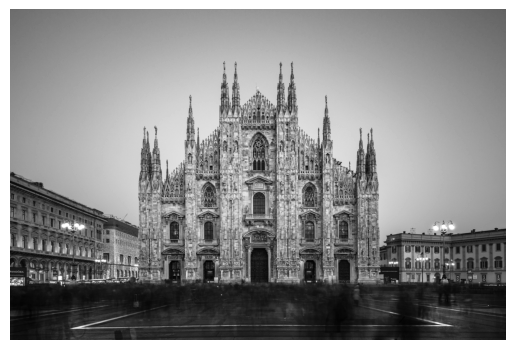

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
import jax
image_path = '/Users/hp/Downloads/duomo.jpg'
img = imread(image_path)
A = np.mean(np.array(img, dtype = np.float64)/255, axis = -1) # convert to grayscale
plt.imshow(A, cmap = 'gray')
plt.axis('off')
A.shape

## Exercise 01

1. Compute the SVD associated with the picture, by using the standard algorithm, that gives the exact (up
    to round-off errors) decomposition. Then, plot the trend w.r.t. i of the singular values $\sigma_i$ . Then, repeat
    the computation by considering the randomized SVD algorithm of rank **k = 25, 50, 100, 200 and 400** . Plot
    the approximate singular values together with the exact singular values. Comment what you see.
    - the singular values $\sigma_k$
    - the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
    - the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$
2. We now want to compress the image.
    * Use the exact SVD to perform image compression for rank k = 25, 50, 100, 200 and 400. Plot the
        compressed image and compute the reconstruction error as a function of k (use the matrix p-norm
        with p = 2).
    * Repeat the same exercise by using the randomized SVD algorithm.
    * Repeat the same exercise by using the randomized SVD algorithm with a +50% oversampling, that
        is by increasing by 50% the number of columns in the matrix random P (round the quantity 1.5k to
        the closest integer).
    * Finally, plot the trend of the reconstruction error of the dataset as a function of k in the three cases.
        Comment on the results.
3. Evaluate the time needed to compute the SVD with the three approaches (SVD, randomized SVD, randomized SVD with oversampling) in the case k = 200.

Text(0.5, 1.0, 'Explained variance')

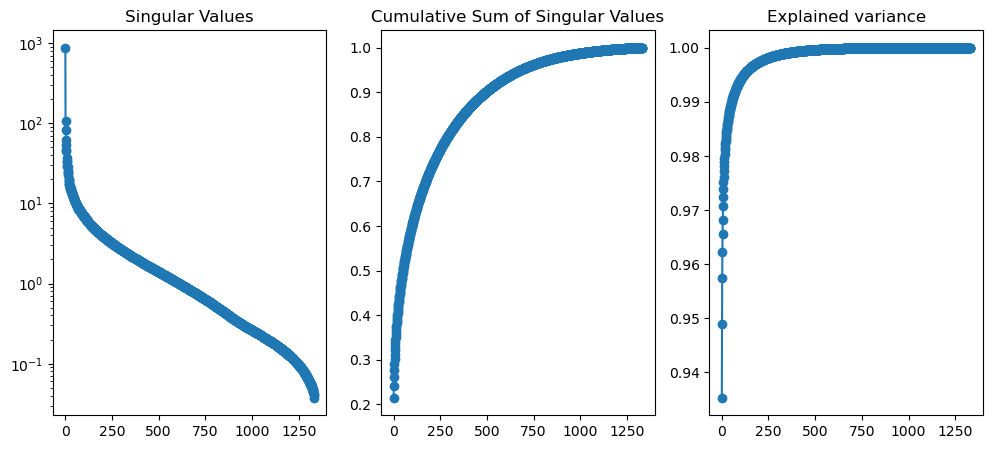

In [5]:
U, s, VT = np.linalg.svd(A, full_matrices = False) #computing svd

# plotting the singular values

fig, axes = plt.subplots(1, 3, figsize = (12, 5))
axes = axes.flatten()

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(s)/np.sum(s),'o-')
axes[1].set_title('Cumulative Sum of Singular Values')

axes[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[2].set_title('Explained variance')

#it is possible to reconstruct the image using only the first 5 singular values, since they explain more than 96% of the variance in the data.

In [24]:
# the randomized SVD algorithm

def randomized_svd(X, k):
    n, m = X.shape
    P = np.random.randn(m, k) # random projection matrix (m, k)
    Z = X @ P # projection of X onto the random space (n, k)
    #print(Z.shape)
    Q, R = np.linalg.qr(Z) # QR decomposition of Z (n, k), (k, k)
    Y = Q.T @ X # projected matrix (k, m) of rank k
    #print(Y.shape)
    U_y, s, VT = np.linalg.svd(Y, full_matrices = False) # SVD of the projected matrix (n, n), (n, m), (m, m) 
    U = Q @ U_y
    return U, s, VT

In [11]:
U_r, s_r, VT_r = randomized_svd(A, 5) # computing the randomized svd with k = 5 singular values

print('U shape: ', U.shape)
print('s shape: ', s.shape)
print('VT shape: ', VT.shape)
print('A shape: ', A.shape)

(1333, 5)
(5, 2000)
U shape:  (1333, 5)
s shape:  (5,)
VT shape:  (5, 2000)
A shape:  (1333, 2000)


(1333, 25)
(25, 2000)
(1333, 50)
(50, 2000)
(1333, 100)
(100, 2000)
(1333, 200)
(200, 2000)
(1333, 400)
(400, 2000)


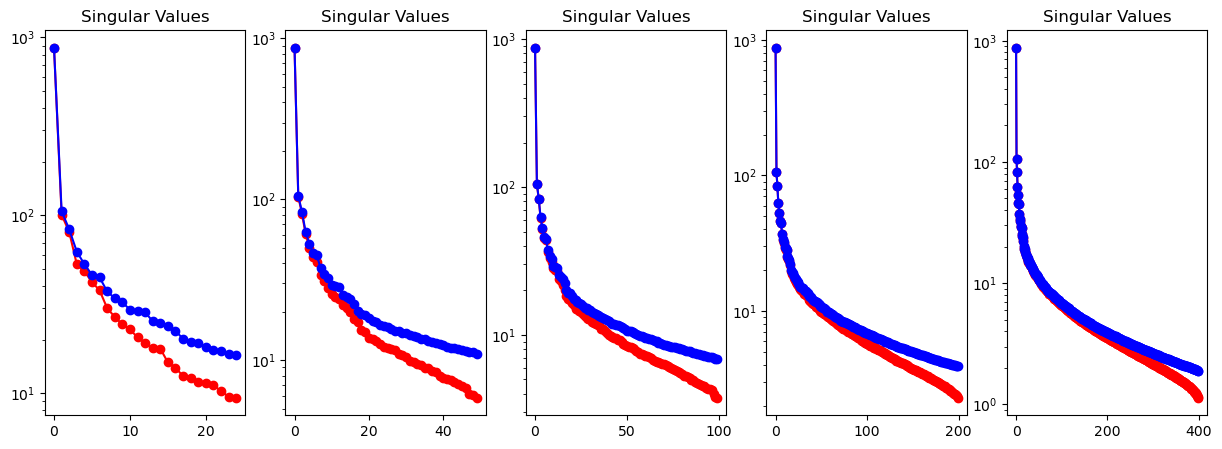

In [15]:
ranks = [25, 50, 100, 200, 400]

U, s, VT = np.linalg.svd(A, full_matrices = False)

fig, axes = plt.subplots(1, 5, figsize = (15, 5))
axes = axes.flatten() 

for i, k in enumerate(ranks):
    U_r, s_r, VT_r = randomized_svd(A, k)
    axes[i].semilogy(s_r, 'o-', color = 'red', label = 'Randomized SVD')
    axes[i].semilogy(s[:k], 'o-', color = 'blue', label = 'SVD')
    axes[i].set_title('Singular Values')

the two plots start divercing pretty soon, but higher is the rank of the randomized approximation, higher is the number of $\sigma_i$ that are closer in the plot

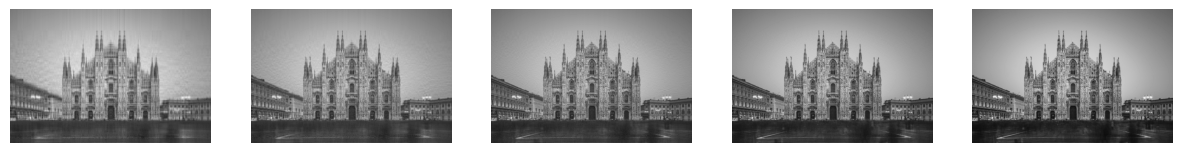

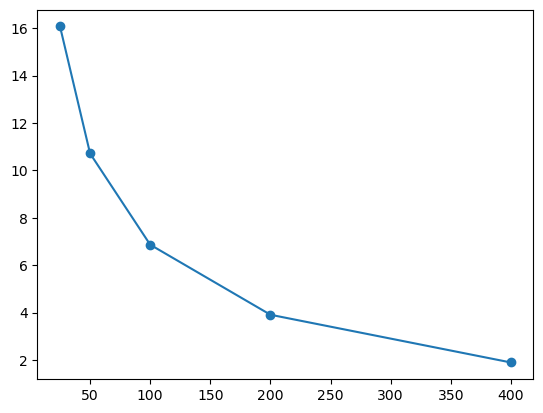

In [16]:
# To compress the image, we can use the first k singular values and the corresponding left and right singular vectors to reconstruct the image.

ranks = [25, 50, 100, 200, 400]

U, s, VT = np.linalg.svd(A, full_matrices = False)

fig, axes = plt.subplots(1, 5, figsize = (15, 5))
axes = axes.flatten()

error_kistory = []
for i, k in enumerate(ranks):
    A_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    axes[i].imshow(A_k, cmap = 'gray') # plot the compressed image
    axes[i].axis('off')

    error_kistory.append(np.linalg.norm(A - A_k, ord = 2)) # compute the error

plt.figure()
plt.plot(ranks, error_kistory, 'o-')

(1333, 25)
(25, 2000)
(1333, 50)
(50, 2000)
(1333, 100)
(100, 2000)
(1333, 200)
(200, 2000)
(1333, 400)
(400, 2000)


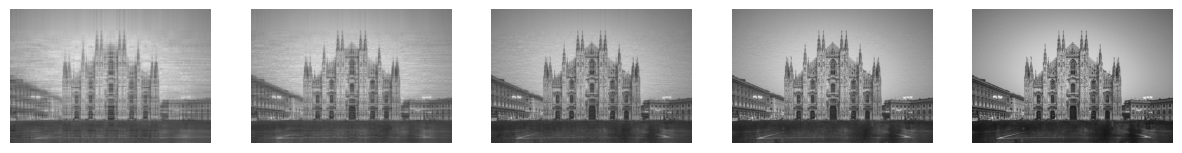

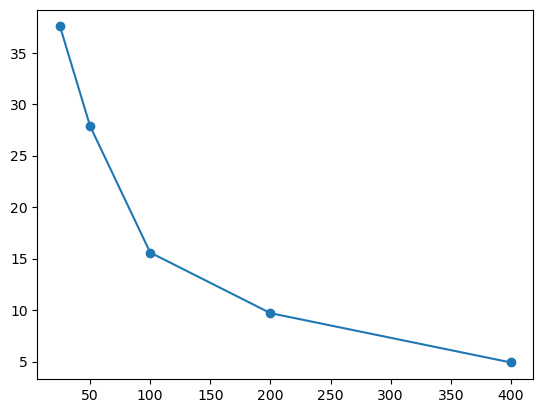

In [17]:
# To compress the image, we can use the first k singular values and the corresponding left and right singular vectors to reconstruct the image.

ranks = [25, 50, 100, 200, 400]

fig, axes = plt.subplots(1, 5, figsize = (15, 5))
axes = axes.flatten()

error_kistory = []
for i, k in enumerate(ranks):
    U_r, s_r, VT_r = randomized_svd(A, k)
    A_k = U_r[:, :k] @ np.diag(s_r[:k]) @ VT_r[:k, :]
    axes[i].imshow(A_k, cmap = 'gray') # plot the compressed image
    axes[i].axis('off')

    error_kistory.append(np.linalg.norm(A - A_k, ord = 2)) # compute the error

plt.figure()
plt.plot(ranks, error_kistory, 'o-')

In [23]:
# the randomized SVD algorithm with oversampling

def randomized_svd_oversample(X, k):
    n, m = X.shape
    P = np.random.randn(m, int(1.5 * k)) # random projection matrix (m, k)
    Z = X @ P # projection of X onto the random space (n, k)
    #print(Z.shape)
    Q, R = np.linalg.qr(Z) # QR decomposition of Z (n, k), (k, k)
    Y = Q.T @ X # projected matrix (k, m) of rank k
    #print(Y.shape)
    U_y, s, VT = np.linalg.svd(Y, full_matrices = False) # SVD of the projected matrix (n, n), (n, m), (m, m) 
    U = Q @ U_y
    return U, s, VT

(1333, 37)
(37, 2000)
(1333, 75)
(75, 2000)
(1333, 150)
(150, 2000)
(1333, 300)
(300, 2000)
(1333, 600)
(600, 2000)


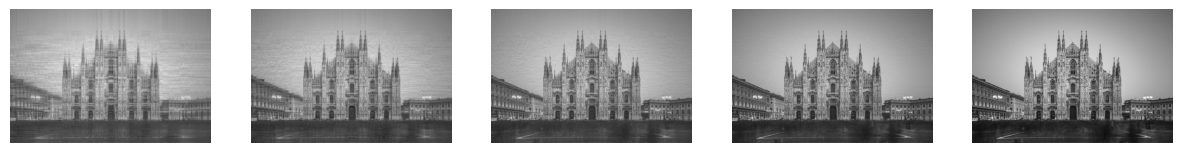

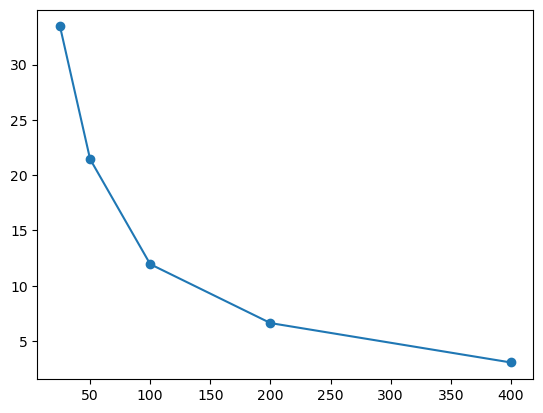

In [20]:
ranks = [25, 50, 100, 200, 400]

fig, axes = plt.subplots(1, 5, figsize = (15, 5))
axes = axes.flatten()

error_kistory = []
for i, k in enumerate(ranks):
    U_r, s_r, VT_r = randomized_svd_oversample(A, k)
    A_k = U_r[:, :k] @ np.diag(s_r[:k]) @ VT_r[:k, :]
    axes[i].imshow(A_k, cmap = 'gray') # plot the compressed image
    axes[i].axis('off')

    error_kistory.append(np.linalg.norm(A - A_k, ord = 2)) # compute the error

plt.figure()
plt.plot(ranks, error_kistory, 'o-')

In [25]:
%timeit randomized_svd(A, 200)
%timeit np.linalg.svd(A, full_matrices = False) # slower than randomized SVD
%timeit randomized_svd(A, 200) # faster than SVD 

268 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.25 s ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
252 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercise 2
Consider the following function

$f(x) = 5x^2 − 6xy + 5y^2 + 4x + 4y$

where $x = (x, y)$

1. Plot the function

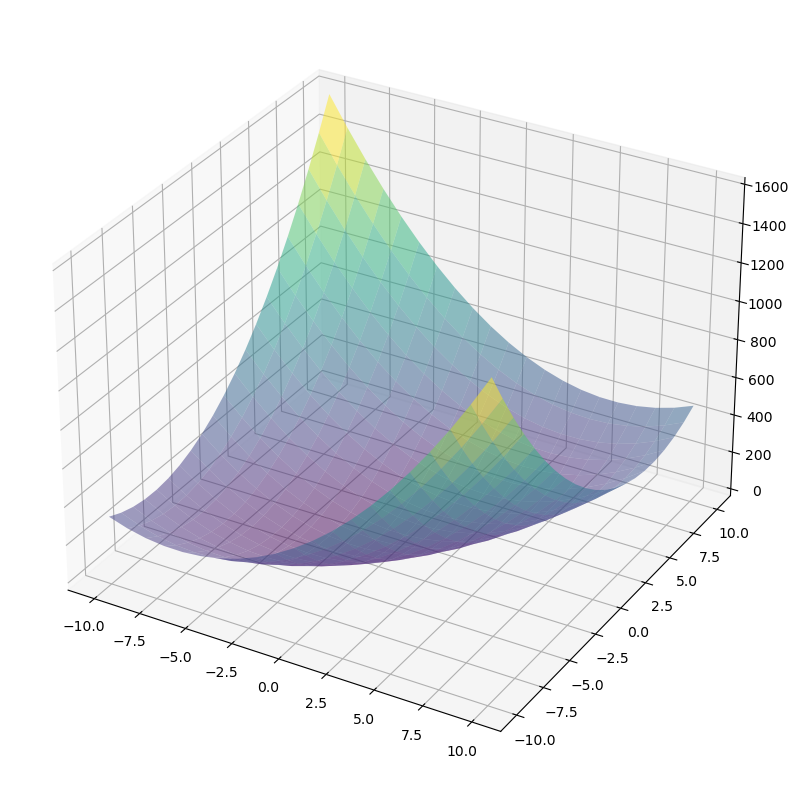

In [54]:
f = lambda x, y: 5*x**2 - 6 *x*y +5 * y**2 + 4* x + 4 * y
x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(*np.meshgrid(x, y), f(*np.meshgrid(x, y)), cmap = 'viridis', alpha = 0.5)

2. Compute analitically the value $x_min$ where the function attains its minimum value and $f(x_min)$

The analytical computation uses the gradient of the function and sets it to zero.

$\nabla_x f = \begin{pmatrix} 10x - 6y + 4 \\  -6x + 10y + 4\end{pmatrix} = \begin{pmatrix} 0 \\ 0\end{pmatrix}$ 

Is satisfied by $x^* = \begin{pmatrix} -1 \\ -1 \end{pmatrix}$

In [56]:
print(x, y)
print(f(-1, -1))
print(x[np.argmin(f(x, y))], y[np.argmin(f(x, y))])

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.] [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
-4
-1.0 -1.0


In [1]:
import jax.numpy as jnp
import jax

def f(x):
    c = 0
    dt = np.array([4, 4])
    H = np.array([[10, -6], [-6, 10]]) # Hessian matrix
    return x.T @ H @ x + dt.T @ x + c

f_jit = jax.jit(f) # jit compilation makes everything faster

where α is the learning rate. Combining (2) and (3) find the expression of αmax (maximum value of α)
such that the GD method is convergent. (Hint: remember that for an iterative method to be convergent
the spectral radius ρ of the iteration matrix must satisfy |ρ| < 1)

In [ ]:
alpha = 0.0

